In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#dir_path = os.path.dirname(os.path.abspath(__file__))
dir_path = '.'

csv_file = os.path.join(dir_path, 'csv', 'archiv', 'rki_' + now.strftime('%Y-%m-%d_%H_%M') + '.csv')
CSVLOC=os.path.join(dir_path, 'csv', 'archiv')



NameError: name 'now' is not defined

In [35]:
df_data = pd.DataFrame()
for item in os.listdir(CSVLOC):
    if os.path.isfile(CSVLOC + '/' + item):
        df_data = pd.concat([df_data,pd.read_csv(CSVLOC + '/' + item,  parse_dates=True)])
        print("added "+ CSVLOC + "/" + item + " to data frame.")
    else:
        print(item + " is no file")
df_data
df_data['date']=pd.to_datetime(df_data.date)
df_data['date'] = df_data.date.dt.strftime('%Y-%m-%d')
df_data['deaths'] = df_data.confirmed.str.extract(r'\((\d+)\)')
df_data['confirmed'] = df_data.confirmed.str.replace(r'(\d+) \(\d+\)', r'\1')
df_data.deaths.replace({np.nan:0}, inplace=True)
df_data = df_data.drop('Unnamed: 0', axis=1)
df_data.drop_duplicates()
df_data['date'] =pd.to_datetime(df_data.date)
df_data = df_data.drop(df_data[df_data.Bundesland=='Gesamt'].index)

.ipynb_checkpoints is no file
added .\csv\archiv/history.csv to data frame.
added .\csv\archiv/rik_2020-03-13_14_25.csv to data frame.
added .\csv\archiv/rki_2020-03-13_21_00.csv to data frame.
added .\csv\archiv/rki_2020-03-14_15_27.csv to data frame.
added .\csv\archiv/rki_2020-03-14_16_01.csv to data frame.


In [36]:
df_data.to_csv('./csv/rki_data.csv')

In [3]:
df = pd.read_csv('http://www.nexolin.de/data/covid-19/rki/rki_data.csv', parse_dates=['date'])

In [4]:
df.dtypes

Unnamed: 0               int64
Bundesland              object
confirmed                int64
confirmed_el            object
extra                   object
date            datetime64[ns]
deaths                   int64
dtype: object

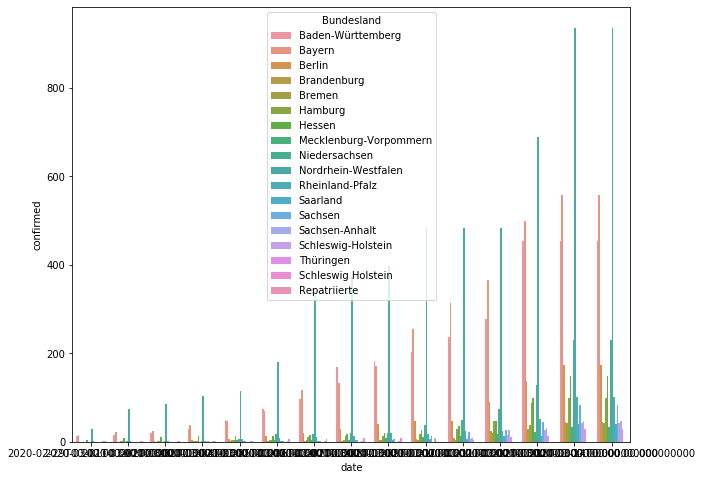

In [7]:
df_plot_data = df
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.barplot(data = df_plot_data, x='date', y='confirmed', hue='Bundesland')

In [8]:
df_plot_data

,Unnamed: 0,Bundesland,confirmed,confirmed_el,extra,date,deaths
0,0,Baden-Württemberg,454,331 (1),NaN,2020-03-12,0
1,1,Bayern,500,317,NaN,2020-03-12,0
2,2,Berlin,137,137,NaN,2020-03-12,0
3,3,Brandenburg,30,23,NaN,2020-03-12,0
4,4,Bremen,38,35,NaN,2020-03-12,0
...,...,...,...,...,...,...,...
206,11,Saarland,40,30,NaN,2020-03-14,0
207,12,Sachsen,83,46,NaN,2020-03-14,0
208,13,Sachsen-Anhalt,42,29,NaN,2020-03-14,0
209,14,Schleswig-Holstein,48,45,NaN,2020-03-14,0
